 #  A Whale off the Port(folio)

In [201]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [202]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv)
whale_returns_data.shape
whale_returns_data.head()
whale_returns_data.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [203]:
# Count nulls
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [204]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna()
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [205]:
# Date as Index and drop old date column 
whale_returns_data.set_index(pd.to_datetime(whale_returns_data['Date'],infer_datetime_format=True),inplace=True)
whale_returns_data.drop(columns=['Date'],inplace=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

In [206]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv)
algo_returns_data.head()
algo_returns_data.count()

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

In [207]:
# Count nulls
algo_returns_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [208]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [209]:
# Set Date as Index 
algo_returns_data.set_index(pd.to_datetime(algo_returns_data['Date'], infer_datetime_format=True),inplace=True)
algo_returns_data.drop(columns=['Date'], inplace=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [210]:
algo_returns_data.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

## S&P 500 Returns

In [211]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [212]:
# Check Data Type 
sp500_history.dtypes

Close    object
dtype: object

In [213]:
# Fix Data Types 
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [214]:
# Change to Float 
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [215]:
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [216]:
# Rename Column
sp500_history.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_history.head()

,S&P 500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


<AxesSubplot:xlabel='Date'>

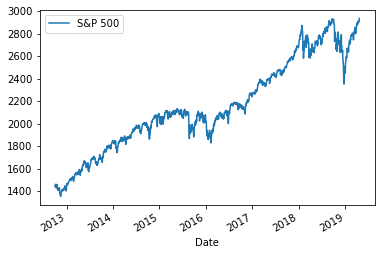

In [217]:
# Plot Daily Returns
sp500_history.plot()

In [218]:
# Calculate using pct_change 
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [219]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


<AxesSubplot:xlabel='Date'>

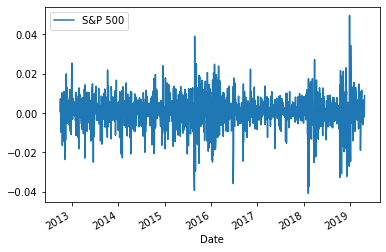

In [220]:
# Plot Daily Returns
sp500_returns.plot()

In [221]:
print(whale_returns_data.head())
print(algo_returns_data.head())
print(sp500_returns.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  
              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001

## Combine Whale, Algorithmic, and S&P 500 Returns

In [222]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([whale_returns_data, algo_returns_data, sp500_returns], axis='columns',join='inner')
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

## Performance

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

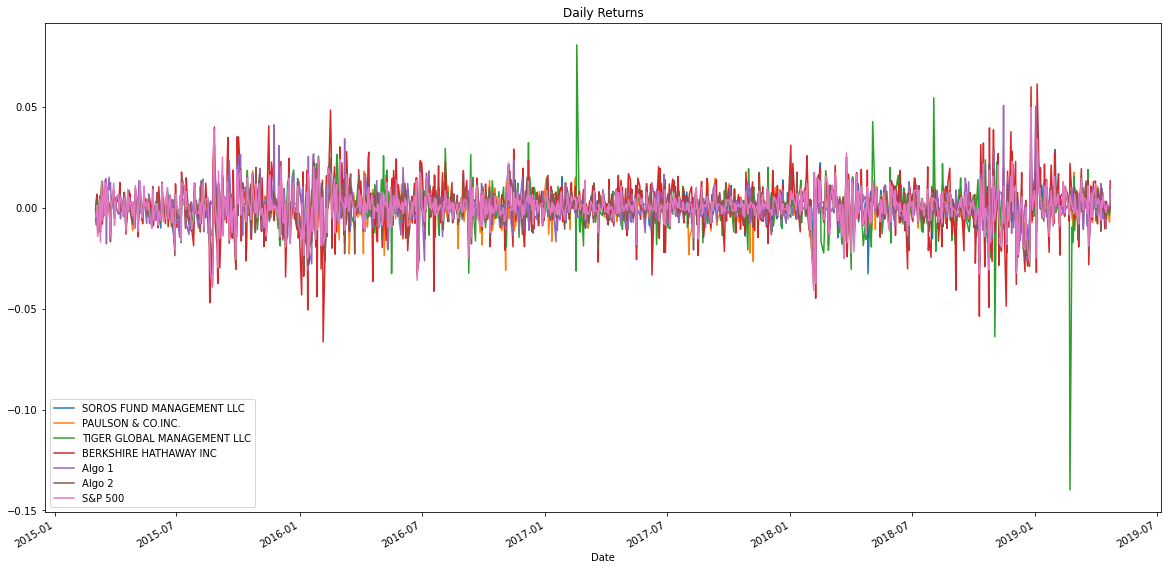

In [223]:
combined_data.plot(figsize=(20,10), title="Daily Returns")

In [224]:
# Plot daily returns
portfolio_daily_returns = combined_data.pct_change()
portfolio_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.033072
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.272547
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-12.850368
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.278290


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

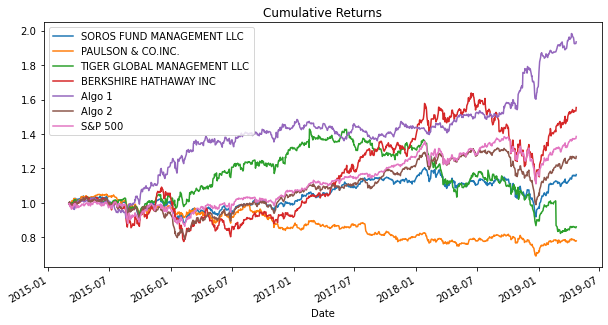

In [225]:
# Plot cumulative returns
cumulative_returns = (1+combined_data).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

---

## Risk

<AxesSubplot:title={'center':'Portfolio Risk'}>

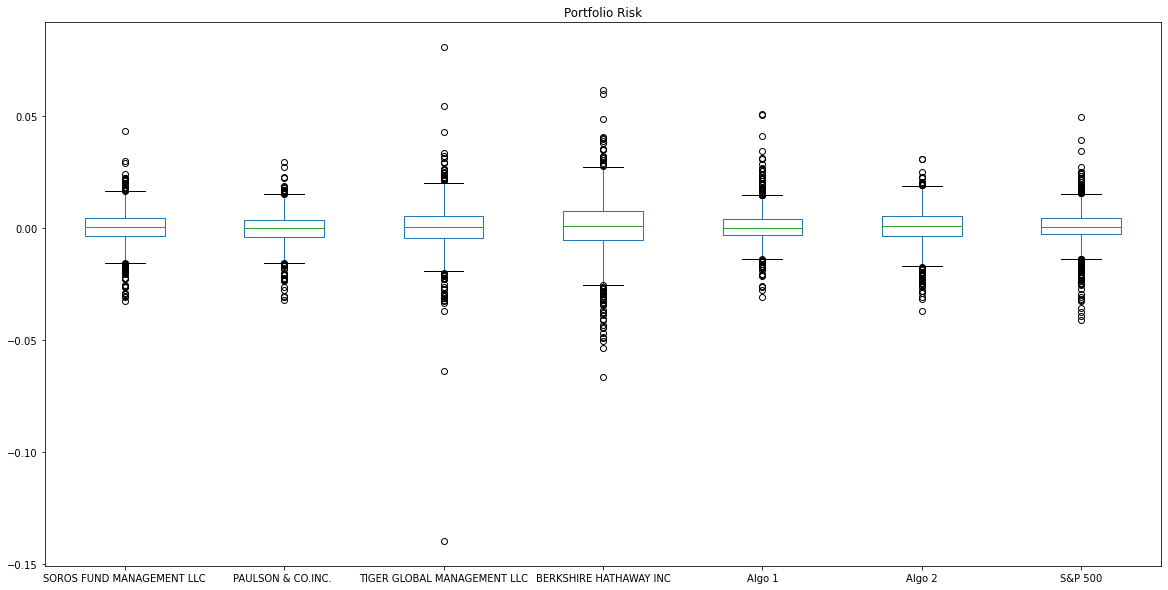

In [226]:
# Box plot to visually show risk
combined_data.plot.box(figsize=(20,10), title="Portfolio Risk")

In [227]:
combined_data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [228]:
# which portfolios riskier than the S&P 500
riskier_sp500 = combined_data["S&P 500"].std()
combined_data.std()>riskier_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [229]:
combined_data.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

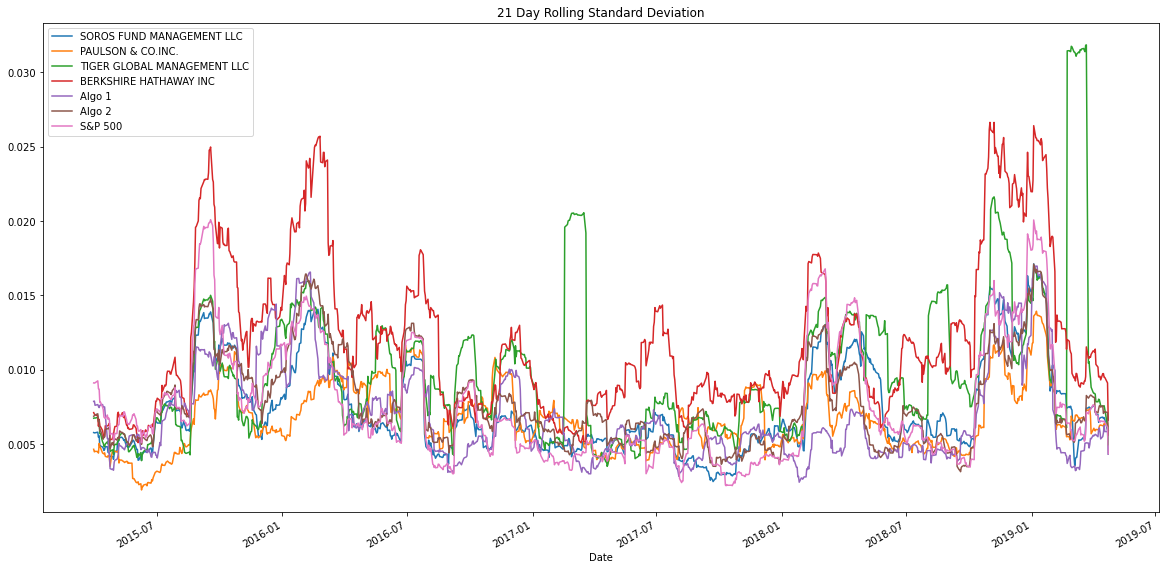

In [230]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_portfolios = combined_data.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

<AxesSubplot:xlabel='Date'>

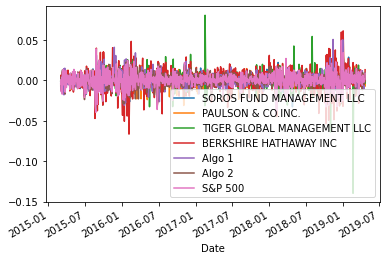

In [231]:
# Correlation
combined_data.plot()

In [232]:
correlation = combined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

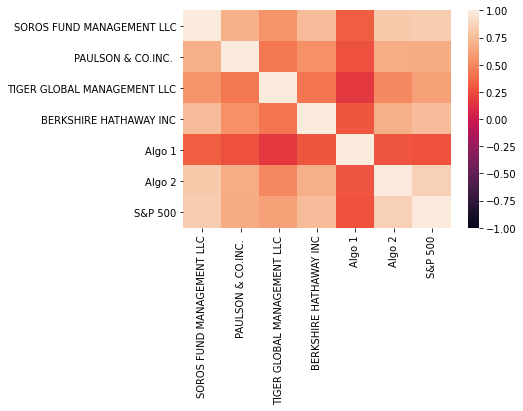

In [233]:
import seaborn as sns
correlation = combined_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

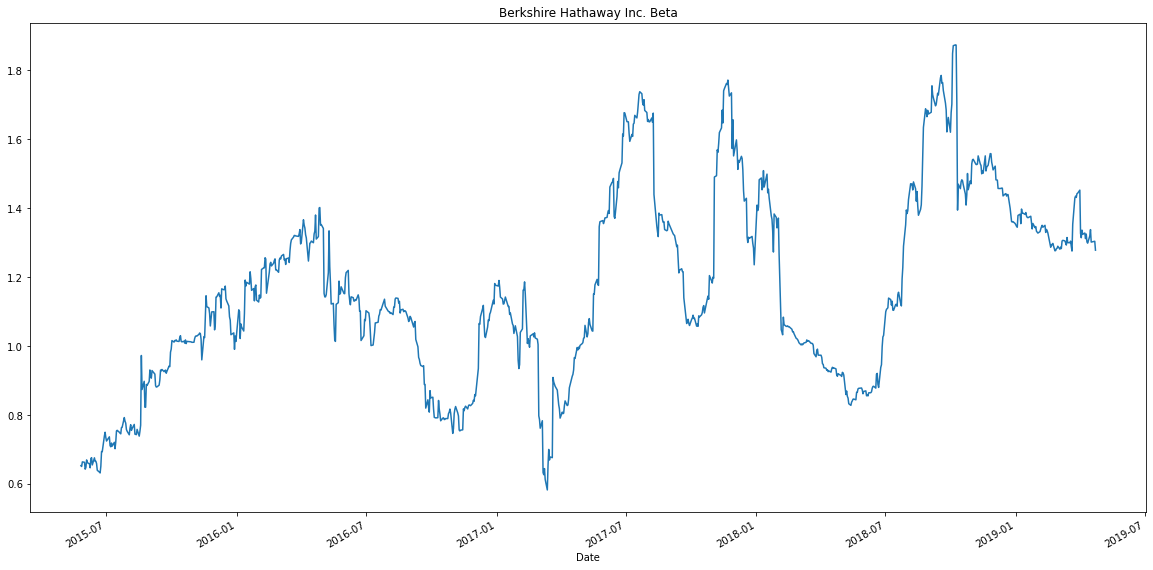

In [234]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_data["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_data["S&P 500"])
variance = combined_data["S&P 500"].rolling(60).var()
(covariance / variance).plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta")

## EXPONENTIALLY WEIGHTED AVERAGE

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

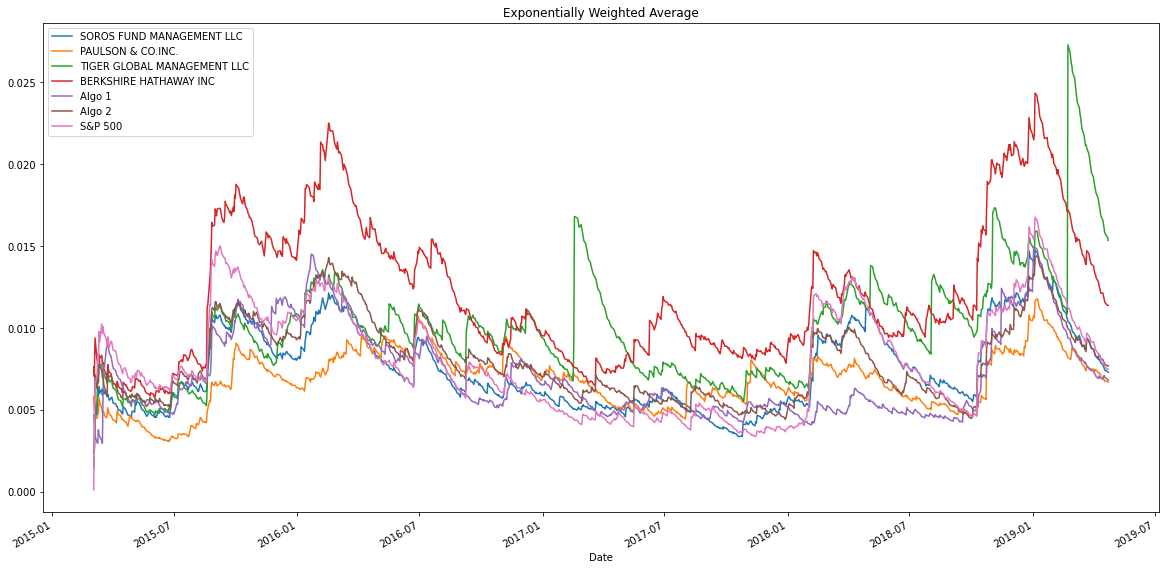

In [235]:
combined_data.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios

In [236]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

<AxesSubplot:title={'center':'Sharpe Ratios'}>

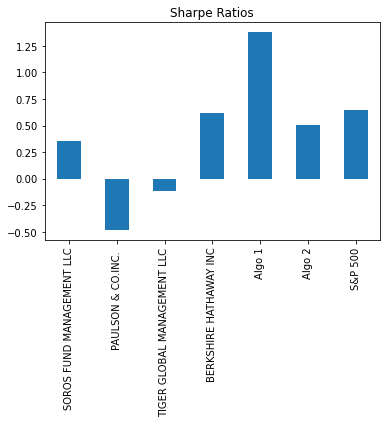

In [237]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---